In [1]:
# Import necessary Libraries
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

import numpy as np
np.seterr(divide='ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
pc_ds = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\PC_2023.xlsx")

In [3]:
pc_ds.head()

,Date,PC Sales,PC-Diesel,PC-Gasoline,Wholesale trading(mil),Retail trading(mil),M1,M3,BEI,IIP,...,GVA_Manu,Evnt_Pos,Evnt_Negative,COSPI1,COSPI,Agriculture,Electricity,Construction,Trade,Real estate
0,2011-07-01,232498,77546,154952,197985,20086,15817.0,68787790.0,121.5,100.31,...,111034.830000,0,1,801969.266667,2646905.3,8.969137e+05,154886.833333,635671.566667,1.134989e+06,1.368753e+06
1,2011-08-01,241556,115622,125934,197985,20086,15843.0,68787790.0,121.5,100.31,...,111034.830000,0,1,801969.266667,2518331.2,8.969137e+05,154886.833333,635671.566667,1.134989e+06,1.368753e+06
2,2011-09-01,257816,113535,144281,197985,20086,15828.0,68787790.0,121.5,100.31,...,111034.830000,0,0,801969.266667,2481991.1,8.969137e+05,154886.833333,635671.566667,1.134989e+06,1.368753e+06
3,2011-10-01,219000,92760,126240,215812,20882,15995.0,72213420.0,118.8,100.31,...,111224.816667,0,1,721882.566667,2728697.7,1.669885e+06,155409.833333,652412.600000,1.163190e+06,1.134477e+06
4,2011-11-01,260589,103040,157549,215812,20882,16152.0,72213420.0,118.8,100.31,...,111224.816667,0,0,721882.566667,2508661.5,1.669885e+06,155409.833333,652412.600000,1.163190e+06,1.134477e+06


In [4]:
pc_ds.set_index('Date',inplace=True)

In [5]:
pc_ds.head()

,PC Sales,PC-Diesel,PC-Gasoline,Wholesale trading(mil),Retail trading(mil),M1,M3,BEI,IIP,PMI,...,GVA_Manu,Evnt_Pos,Evnt_Negative,COSPI1,COSPI,Agriculture,Electricity,Construction,Trade,Real estate
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-01,232498,77546,154952,197985,20086,15817.0,68787790.0,121.5,100.31,52.1,...,111034.830000,0,1,801969.266667,2646905.3,8.969137e+05,154886.833333,635671.566667,1.134989e+06,1.368753e+06
2011-08-01,241556,115622,125934,197985,20086,15843.0,68787790.0,121.5,100.31,52.8,...,111034.830000,0,1,801969.266667,2518331.2,8.969137e+05,154886.833333,635671.566667,1.134989e+06,1.368753e+06
2011-09-01,257816,113535,144281,197985,20086,15828.0,68787790.0,121.5,100.31,53.1,...,111034.830000,0,0,801969.266667,2481991.1,8.969137e+05,154886.833333,635671.566667,1.134989e+06,1.368753e+06
2011-10-01,219000,92760,126240,215812,20882,15995.0,72213420.0,118.8,100.31,52.8,...,111224.816667,0,1,721882.566667,2728697.7,1.669885e+06,155409.833333,652412.600000,1.163190e+06,1.134477e+06
2011-11-01,260589,103040,157549,215812,20882,16152.0,72213420.0,118.8,100.31,51.3,...,111224.816667,0,0,721882.566667,2508661.5,1.669885e+06,155409.833333,652412.600000,1.163190e+06,1.134477e+06


In [6]:
pc_ds.describe()

,PC Sales,PC-Diesel,PC-Gasoline,Wholesale trading(mil),Retail trading(mil),M1,M3,BEI,IIP,PMI,...,GVA_Manu,Evnt_Pos,Evnt_Negative,COSPI1,COSPI,Agriculture,Electricity,Construction,Trade,Real estate
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02
mean,296237.108696,129786.840580,166450.268116,185978.543478,48646.956522,30552.672717,1.331579e+08,116.426087,96.694130,52.308696,...,178964.752101,0.224638,0.072464,3.489694e+06,8.492485e+06,1.484869e+06,262036.757246,7.714405e+05,1.911170e+06,2.318699e+06
std,57583.637229,33937.320464,36690.824651,75784.339575,21810.630156,11697.053552,4.247736e+07,8.359900,14.450357,3.549904,...,52962.936245,0.418864,0.260199,2.470791e+06,4.529210e+06,3.294977e+05,126795.312688,1.235790e+05,6.391068e+05,9.148268e+05
min,4059.000000,1306.000000,2753.000000,89455.000000,20086.000000,15817.000000,6.878779e+07,99.500000,7.000000,27.400000,...,111034.830000,0.000000,0.000000,7.218826e+05,2.404068e+06,8.969137e+05,154886.833333,4.381232e+05,1.114280e+06,1.134477e+06
25%,267334.500000,110718.000000,146308.750000,147332.000000,27706.000000,20984.500000,9.774040e+07,112.800000,92.025000,51.300000,...,132934.403333,0.000000,0.000000,1.518663e+06,4.852403e+06,1.221432e+06,173488.266667,6.859682e+05,1.423721e+06,1.649609e+06
50%,298848.500000,126094.500000,167414.000000,166365.500000,44431.500000,26860.500000,1.277520e+08,114.400000,97.500000,52.400000,...,170681.596667,0.000000,0.000000,2.823377e+06,8.178235e+06,1.422000e+06,215828.433333,7.521067e+05,1.816075e+06,2.021243e+06
75%,335806.750000,142092.000000,191855.500000,194972.000000,66021.000000,38533.600875,1.644893e+08,116.800000,101.900000,53.975000,...,200512.350000,0.000000,0.000000,4.134303e+06,1.043436e+07,1.739329e+06,263879.716667,8.636610e+05,2.147413e+06,2.716065e+06
max,406964.000000,233030.000000,231768.000000,497911.000000,92687.000000,55271.000000,2.185923e+08,139.300000,134.700000,58.900000,...,311066.803333,1.000000,1.000000,9.643700e+06,2.339049e+07,2.208962e+06,625937.600000,1.127611e+06,3.810171e+06,4.836027e+06


In [7]:
pc_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2011-07-01 to 2022-12-01
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PC Sales                138 non-null    int64  
 1   PC-Diesel               138 non-null    int64  
 2   PC-Gasoline             138 non-null    int64  
 3   Wholesale trading(mil)  138 non-null    int64  
 4   Retail trading(mil)     138 non-null    int64  
 5   M1                      138 non-null    float64
 6   M3                      138 non-null    float64
 7   BEI                     138 non-null    float64
 8   IIP                     138 non-null    float64
 9   PMI                     138 non-null    float64
 10  CC                      138 non-null    float64
 11  WPI                     138 non-null    float64
 12  GDP                     138 non-null    float64
 13  CMR                     138 non-null    float64
 14  Vloans                 

In [8]:
pc_ds.shape

(138, 30)

In [9]:
pc_ds.isnull().sum()

PC Sales                  0
PC-Diesel                 0
PC-Gasoline               0
Wholesale trading(mil)    0
Retail trading(mil)       0
M1                        0
M3                        0
BEI                       0
IIP                       0
PMI                       0
CC                        0
WPI                       0
GDP                       0
CMR                       0
Vloans                    0
Ind_freight               0
Diesel Rates              0
Season_Index              0
GVA Mining                0
GVA_Cons                  0
GVA_Manu                  0
Evnt_Pos                  0
Evnt_Negative             0
COSPI1                    0
COSPI                     0
Agriculture               0
Electricity               0
Construction              0
Trade                     0
Real estate               0
dtype: int64

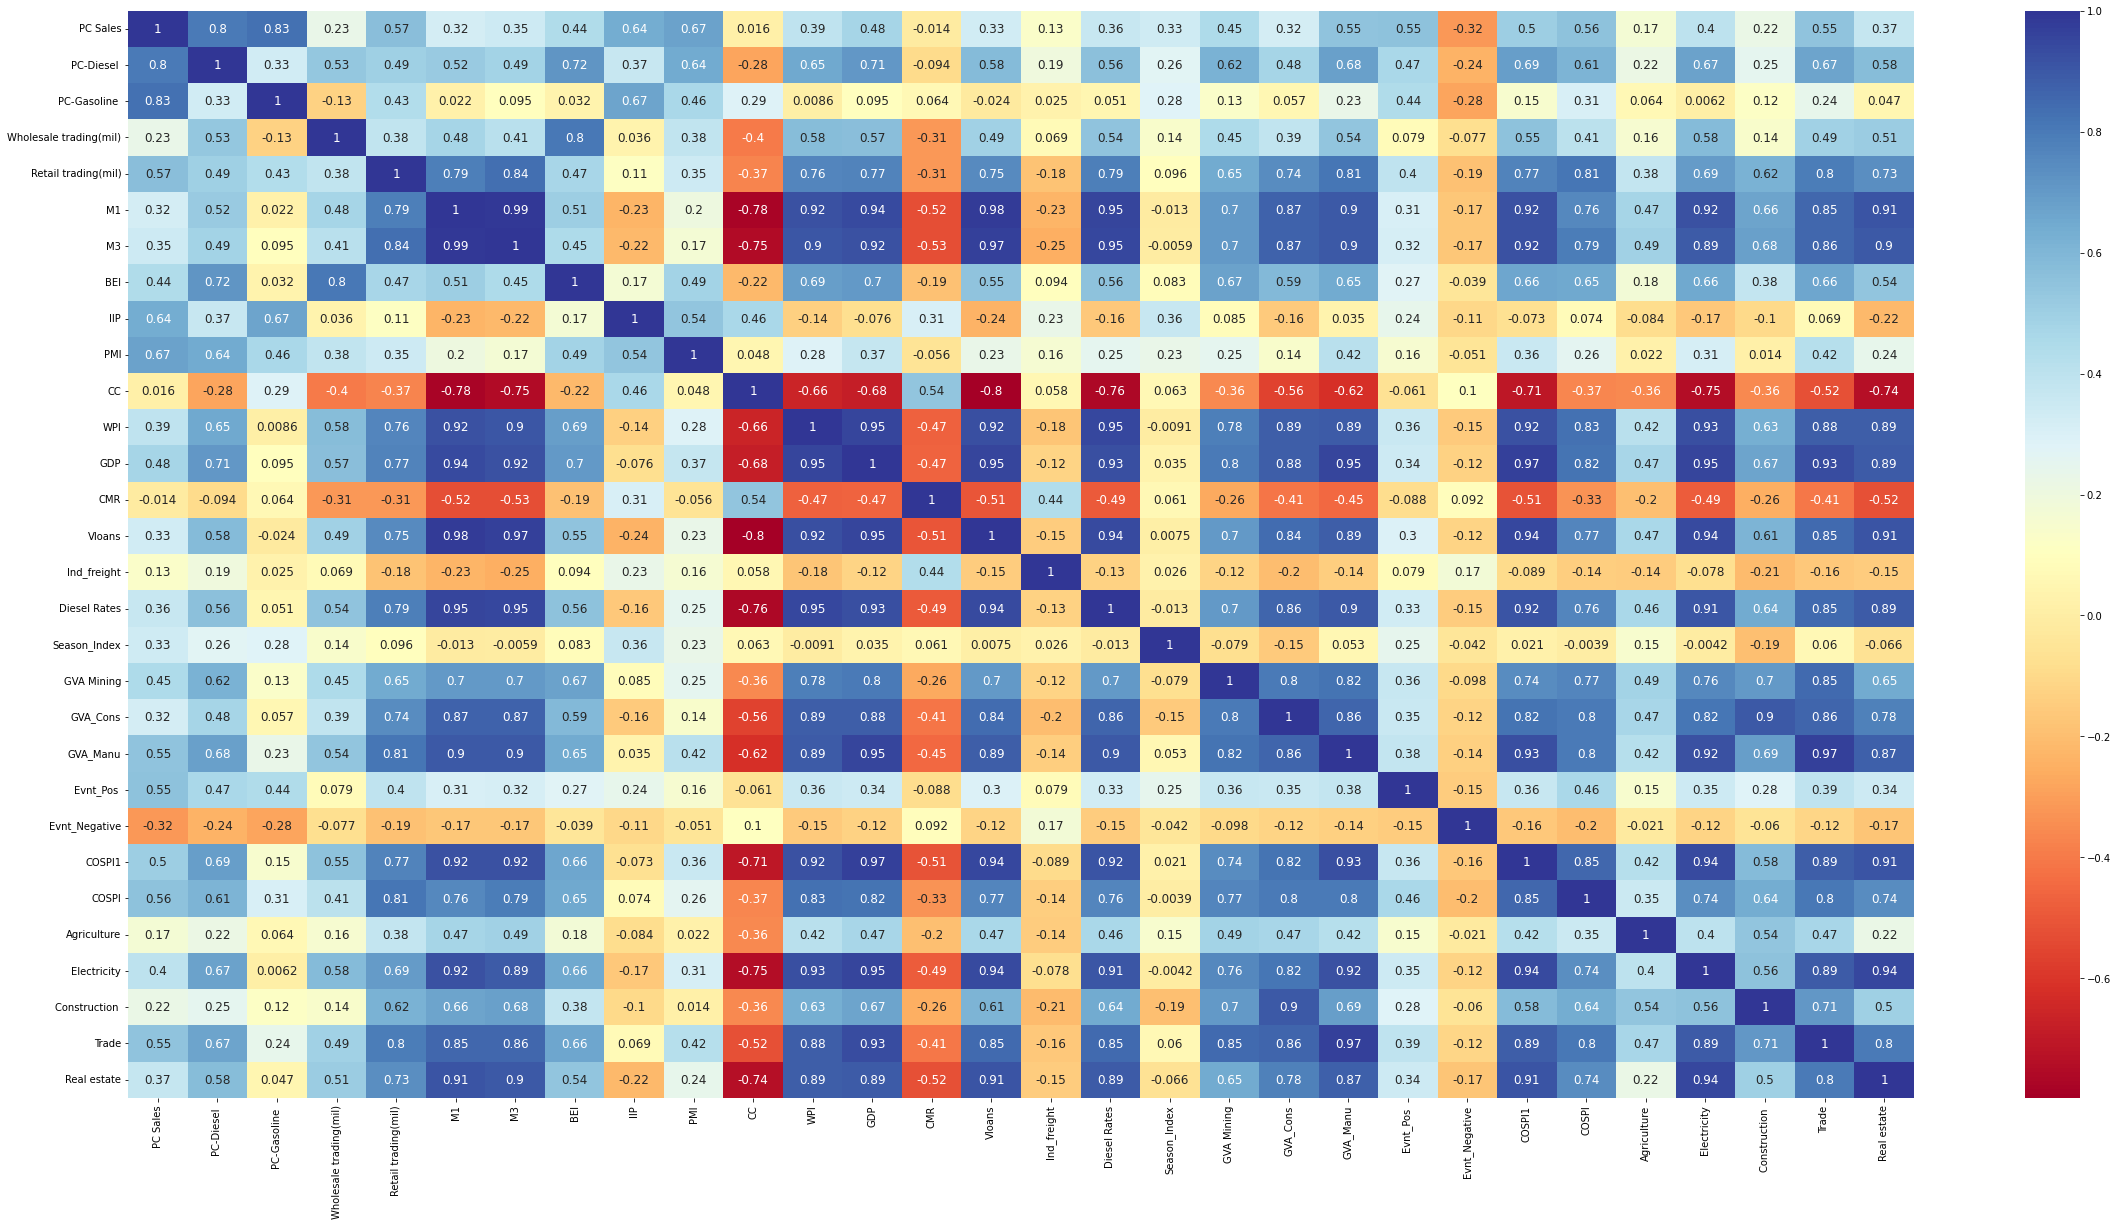

In [10]:
pc_corr = pc_ds.corr()
x,y = plt.subplots(figsize=(40,20))
sns.heatmap(pc_corr,cmap='RdYlBu',yticklabels=pc_corr.columns,annot=True,annot_kws={'fontsize':12})
plt.show()

In [11]:
pc_ds.columns

Index(['PC Sales', 'PC-Diesel ', 'PC-Gasoline ', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'GDP', 'CMR', 'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index',
       'GVA Mining', 'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative',
       'COSPI1', 'COSPI', 'Agriculture', 'Electricity', 'Construction ',
       'Trade', 'Real estate'],
      dtype='object')

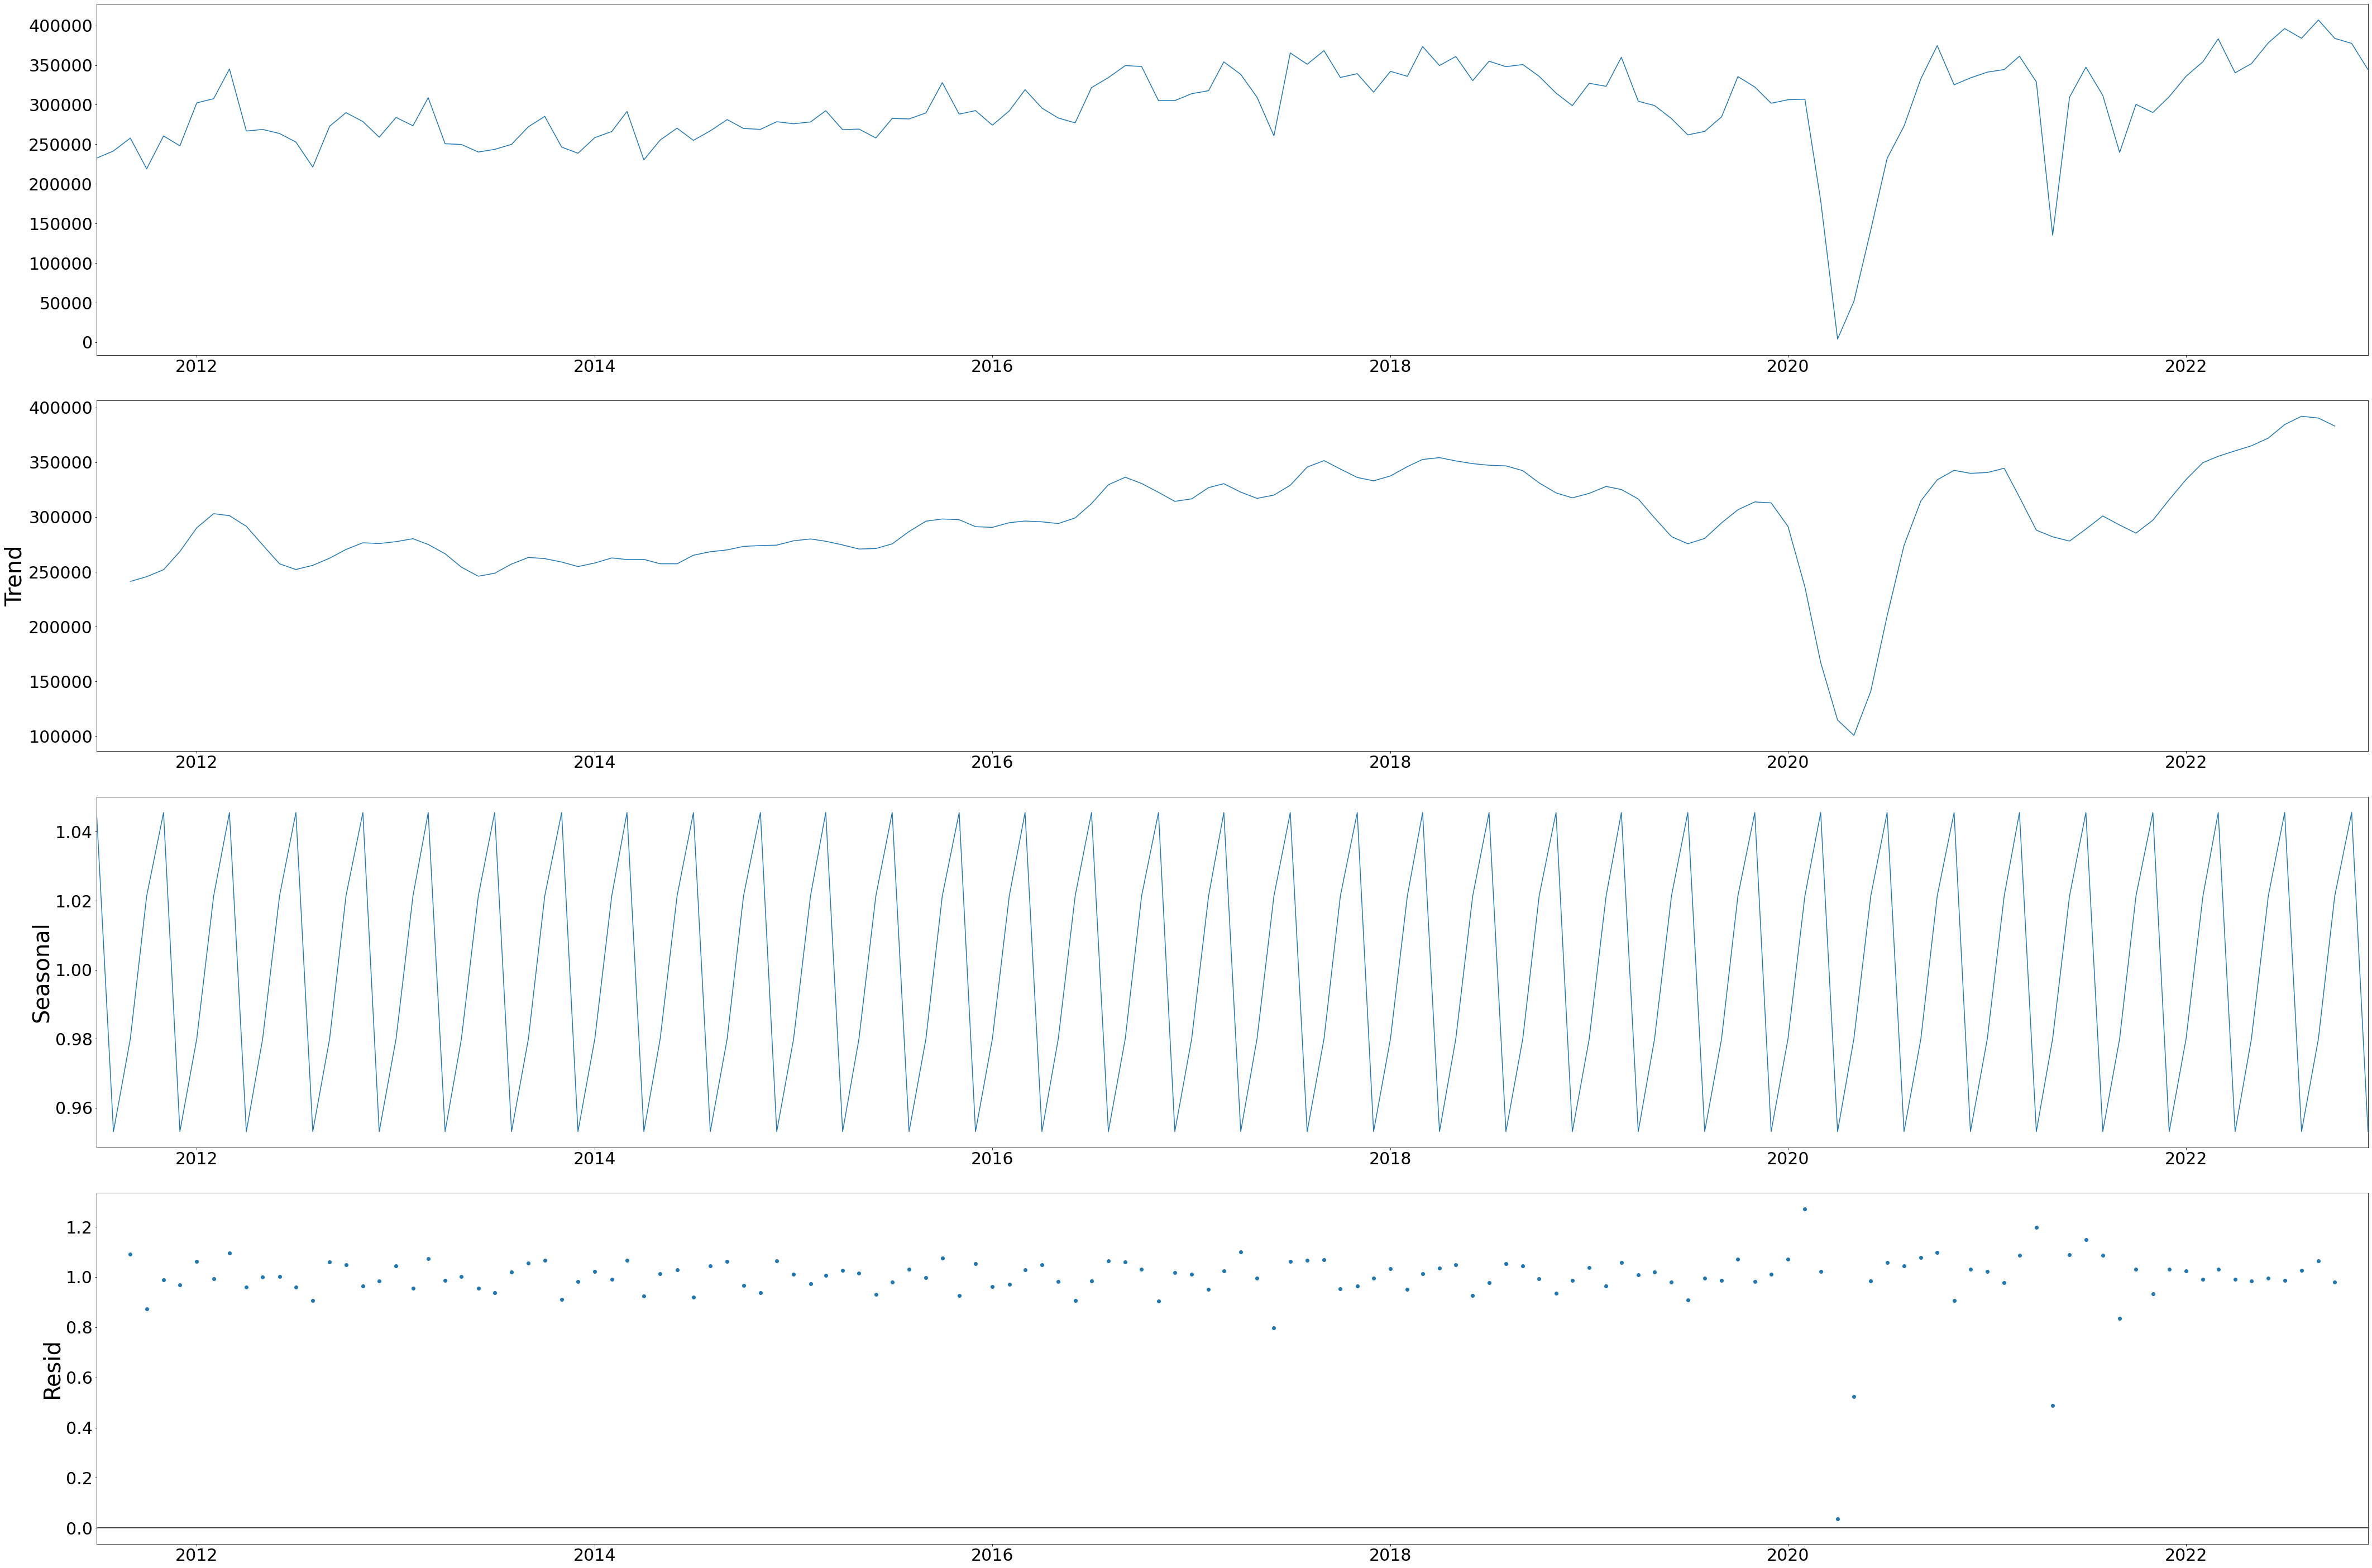

In [12]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
PC_Sales = pc_ds[['PC Sales']]
result = seasonal_decompose(PC_Sales, model='mulitplicative',period=4)
fig_size = plt.rcParams["figure.figsize"]
#plt.rcParams.update({'font.size': 22}
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('font', size=40)
fig_size[0] = 60
fig_size[1] = 40
result.plot(seasonal=True)
pyplot.show()

In [13]:
import dtale
dtale.show(pc_ds)

In [14]:
import sweetviz as sv

pc_report = sv.analyze(pc_ds)
pc_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
import pandas as pd
from pandas_profiling import ProfileReport

2023-05-12 13:52:38,324 - INFO     - Pandas backend loaded 1.5.2
2023-05-12 13:52:38,333 - INFO     - Numpy backend loaded 1.21.5
2023-05-12 13:52:38,340 - INFO     - Pyspark backend loaded 3.3.1
2023-05-12 13:52:38,340 - INFO     - Python backend loaded


In [16]:
#PC
PC_report = ProfileReport(pc_ds)
PC_report.to_file(output_file ='PC_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Train and Test Split

In [17]:
# LCV
pc_ds.columns

Index(['PC Sales', 'PC-Diesel ', 'PC-Gasoline ', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'GDP', 'CMR', 'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index',
       'GVA Mining', 'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative',
       'COSPI1', 'COSPI', 'Agriculture', 'Electricity', 'Construction ',
       'Trade', 'Real estate'],
      dtype='object')

In [18]:
X = pc_ds.drop('PC Sales', axis = 1)
Y = pc_ds[['PC Sales']]

In [19]:
X.columns

Index(['PC-Diesel ', 'PC-Gasoline ', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'GDP', 'CMR', 'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index',
       'GVA Mining', 'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative',
       'COSPI1', 'COSPI', 'Agriculture', 'Electricity', 'Construction ',
       'Trade', 'Real estate'],
      dtype='object')

In [20]:
Y.columns

Index(['PC Sales'], dtype='object')

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
## This line instantiates the model. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1,shuffle=False)

In [22]:
rf = RandomForestRegressor(n_estimators=20) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_train, y_train)

0.9933707336521586

In [23]:
rf.score(X_test, y_test)

-0.4475920503940385

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

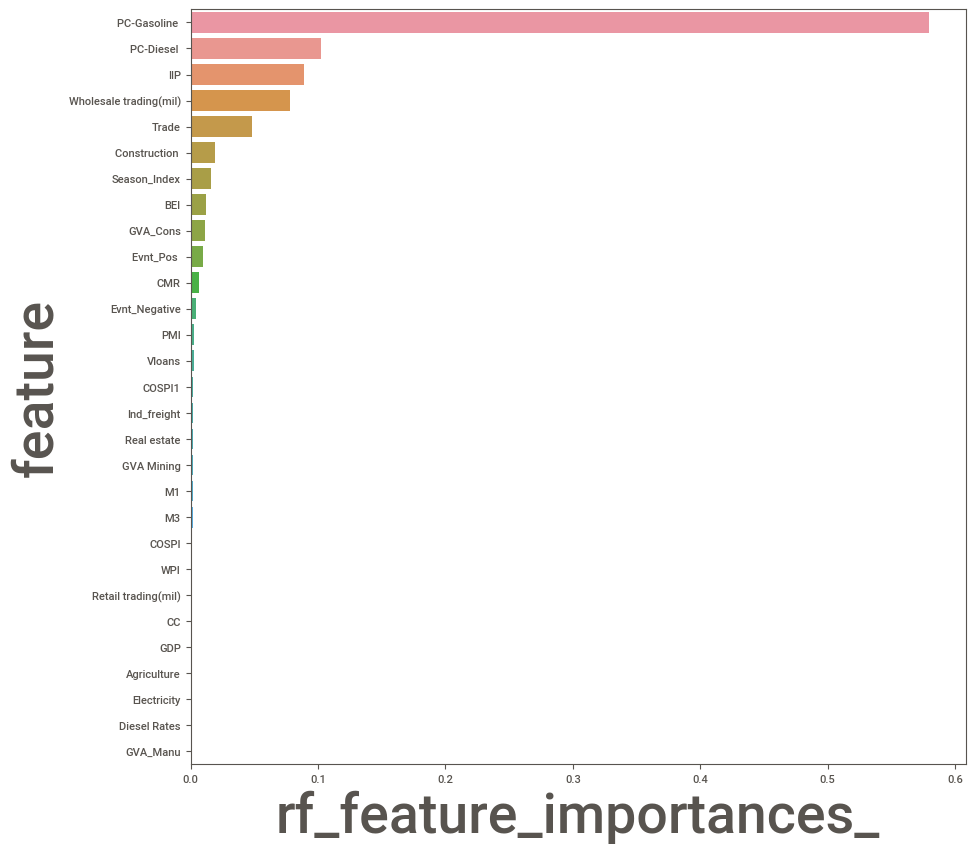

In [24]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':rf.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
#features_df.to_csv("HCV_RF2.csv")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [25]:
param_test = {'max_depth':[3,5,7,8,9,10], 'min_samples_split':[2,3,4,5,6],
                'n_estimators':[100,200,400,600,800,1000], 'max_features': ['sqrt' , 'auto']}
gsearch = GridSearchCV(estimator = RandomForestRegressor(random_state=10),param_grid = param_test, scoring='r2',n_jobs=-1,cv=5)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 400, 600, 800, 1000]},
             scoring='r2')

In [26]:
mod1=RandomForestRegressor(min_samples_split =gsearch.best_params_['min_samples_split'],\
                          n_estimators = gsearch.best_params_['n_estimators'], max_depth = gsearch.best_params_['max_depth']\
                          ,max_features=gsearch.best_params_['max_features'] ,n_jobs = -1,random_state=10)\
                        .fit(X_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

In [27]:
features_df.to_csv(r'C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Indicators/features_PC.csv')

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

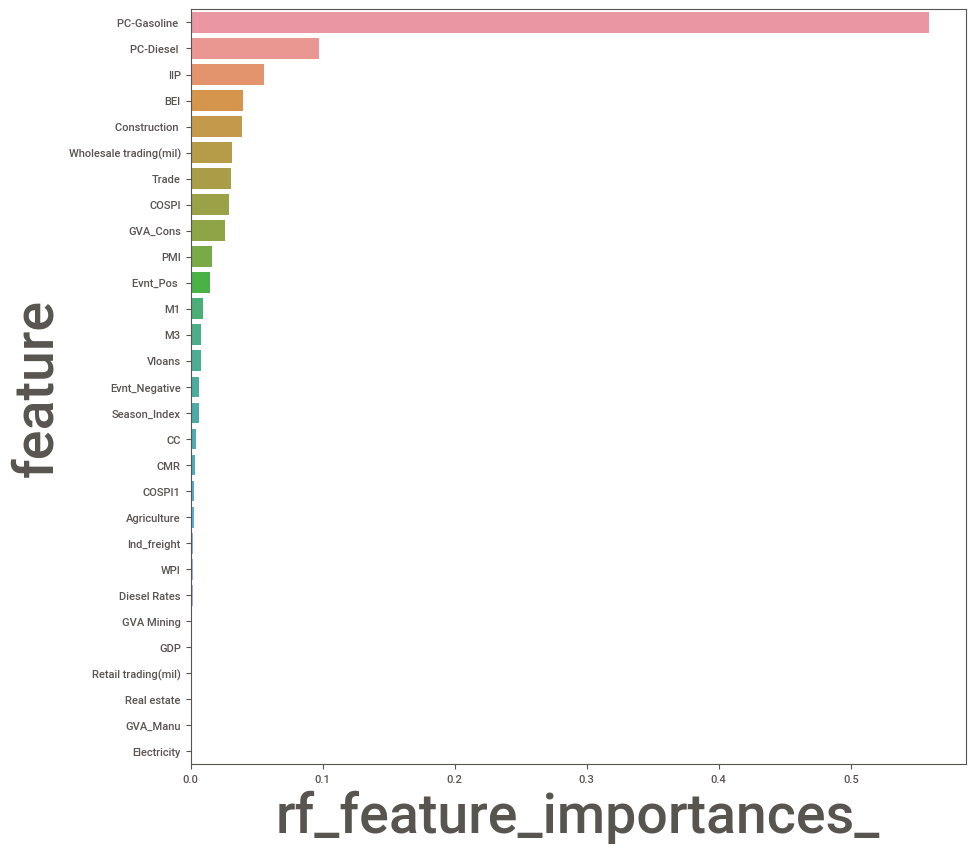

In [28]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':mod1.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [29]:
var1 = ['PC-Diesel ', 'PC-Gasoline ', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'GDP', 'CMR', 'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index',
       'GVA Mining', 'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative',
       'COSPI1', 'COSPI', 'Agriculture', 'Electricity', 'Construction ',
       'Trade', 'Real estate']

In [374]:
var = ['PC Sales', 'PC-Diesel ','Wholesale trading(mil)','PMI','CMR_sqrt',
       'Season_Index', 'GVA_Cons_log',
       'Evnt_Pos ','Evnt_Negative']

In [375]:
#pc_ds['IIP_inv'] = np.sqrt(pc_ds['IIP'])

In [376]:
pc_ds['CMR_sqrt'] = np.sqrt(pc_ds['CMR'])

In [377]:
pc_ds['GVA_Cons_log'] = np.log(pc_ds['GVA_Cons'])

In [378]:
#pc_ds['M1_inv'] = 1/pc_ds['M1']

In [379]:
pc_before = pc_ds[var1]

In [380]:
pc_after = pc_ds[var]

In [381]:
X1 = sm.tools.add_constant(pc_before)
X2 = sm.tools.add_constant(pc_after)

In [382]:
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after =  pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

In [383]:
print('DATA BEFORE')
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                     13234.456167
PC-Diesel                    12.671076
PC-Gasoline                  10.158567
Wholesale trading(mil)       12.038163
Retail trading(mil)          17.227631
M1                          160.906236
M3                          474.459540
BEI                          30.113391
IIP                           4.442044
PMI                           5.476834
CC                           20.670034
WPI                          74.909917
GDP                         175.671918
CMR                           2.901022
Vloans                      191.683671
Ind_freight                   3.085744
Diesel Rates                 43.814700
Season_Index                  2.581670
GVA Mining                   12.755296
GVA_Cons                     89.840897
GVA_Manu                    111.809918
Evnt_Pos                      2.654712
Evnt_Negative                 1.733143
COSPI1                      119.525302
COSPI                        39.267454
Agriculture              

In [384]:
print("DATA AFTER")
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const                     6444.589196
PC Sales                     5.477281
PC-Diesel                    4.544834
Wholesale trading(mil)       1.995442
PMI                          2.713796
CMR_sqrt                     1.328934
Season_Index                 1.301399
GVA_Cons_log                 1.827663
Evnt_Pos                     1.815314
Evnt_Negative                1.234224
dtype: float64

In [385]:
X3 = pc_after.drop('PC Sales', axis = 1)
Y3 = pc_after[['PC Sales']]

In [386]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.20, random_state=1,shuffle=False)

In [387]:
X4 = sm.add_constant(X3)

# OLS model
pc_model = sm.OLS(Y3, X4)
pc_model_fit = pc_model.fit()

In [388]:
print(pc_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               PC Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     72.20
Date:                Fri, 12 May 2023   Prob (F-statistic):           6.23e-44
Time:                        14:50:25   Log-Likelihood:                -1590.6
No. Observations:                 138   AIC:                             3199.
Df Residuals:                     129   BIC:                             3226.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.58

In [415]:
pc_for = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\PC_Forecast_2023_2024.csv")

In [416]:
pc_for = pc_for.set_index('Date')

In [417]:
pc_for.columns

Index(['Const', 'PC-Diesel _fitted', 'Wholesale trading(mil)_upper',
       'PMI_upper', 'CMR_fitted', 'CMR_Sqrt', 'Season_Index', 'GVA_Cons_upper',
       'GVA_Cons_log', 'Event_Pos', 'Event_Negative'],
      dtype='object')

In [418]:
pc_for.head()

,Const,PC-Diesel _fitted,Wholesale trading(mil)_upper,PMI_upper,CMR_fitted,CMR_Sqrt,Season_Index,GVA_Cons_upper,GVA_Cons_log,Event_Pos,Event_Negative
Date,,,,,,,,,,,
Jan-23,1,199113.0438,225571.2085,59.549369,5.859214,2.420581,0.998766,1679768.268,6.225249,0,0
Feb-23,1,193053.4534,239475.5261,57.921381,5.530879,2.351782,1.000127,1678992.201,6.225049,0,0
Mar-23,1,193527.0980,248707.8184,55.968150,5.301182,2.302430,1.202582,1672907.954,6.223472,0,0
Apr-23,1,163690.4251,217445.1273,47.313552,5.142851,2.267786,0.796020,2014584.027,6.304185,0,0
May-23,1,145328.6887,222434.4252,48.518948,4.951477,2.225191,0.870706,2008208.734,6.302809,0,0


In [419]:
X4

,PC-Diesel,Wholesale trading(mil),PMI,CMR_sqrt,Season_Index,GVA_Cons_log,Evnt_Pos,Evnt_Negative
Date,,,,,,,,
2011-07-01,77546,197985,52.1,2.679627,0.997454,13.316936,0,1
2011-08-01,115622,197985,52.8,2.688494,0.991397,13.316936,0,1
2011-09-01,113535,197985,53.1,2.729552,1.039472,13.316936,0,0
2011-10-01,92760,215812,52.8,2.775638,1.066099,13.353982,0,1
2011-11-01,103040,215812,51.3,2.772614,1.011390,13.353982,0,0
...,...,...,...,...,...,...,...,...
2022-08-01,219925,288346,56.2,2.218107,1.004360,14.255795,1,0
2022-09-01,233030,288346,55.1,2.269361,1.053067,14.255795,1,0
2022-10-01,209759,209054,55.3,2.439262,1.085334,14.196126,1,0


In [420]:
pc_for['GVA_Cons_log1'] = np.log(pc_for['GVA_Cons_upper'])

In [421]:
pc_for['CMR_log1'] = np.log(pc_for['CMR_fitted'])

In [422]:
pc_for.columns

Index(['Const', 'PC-Diesel _fitted', 'Wholesale trading(mil)_upper',
       'PMI_upper', 'CMR_fitted', 'CMR_Sqrt', 'Season_Index', 'GVA_Cons_upper',
       'GVA_Cons_log', 'Event_Pos', 'Event_Negative', 'GVA_Cons_log1',
       'CMR_log1'],
      dtype='object')

In [423]:
pc_for

,Const,PC-Diesel _fitted,Wholesale trading(mil)_upper,PMI_upper,CMR_fitted,CMR_Sqrt,Season_Index,GVA_Cons_upper,GVA_Cons_log,Event_Pos,Event_Negative,GVA_Cons_log1,CMR_log1
Date,,,,,,,,,,,,,
Jan-23,1,199113.0438,225571.2085,59.549369,5.859214,2.420581,0.998766,1679768.268,6.225249,0,0,14.334166,1.768016
Feb-23,1,193053.4534,239475.5261,57.921381,5.530879,2.351782,1.000127,1678992.201,6.225049,0,0,14.333704,1.710347
Mar-23,1,193527.0980,248707.8184,55.968150,5.301182,2.302430,1.202582,1672907.954,6.223472,0,0,14.330074,1.667930
Apr-23,1,163690.4251,217445.1273,47.313552,5.142851,2.267786,0.796020,2014584.027,6.304185,0,0,14.515923,1.637608
May-23,1,145328.6887,222434.4252,48.518948,4.951477,2.225191,0.870706,2008208.734,6.302809,0,0,14.512754,1.599686
Jun-23,1,159447.1506,226217.2657,53.927032,4.879438,2.208945,0.944056,2002719.360,6.301620,0,0,14.510016,1.585030
Jul-23,1,172624.9486,286838.4639,53.598589,4.810271,2.193233,0.938752,1673160.138,6.223538,0,0,14.330225,1.570753
Aug-23,1,169782.7025,289497.1932,55.568875,4.792198,2.189109,0.953332,1669715.280,6.222642,0,0,14.328164,1.566989
Sep-23,1,170801.2942,291629.7527,57.099749,4.755762,2.180771,1.060360,1667005.153,6.221937,0,0,14.326539,1.559357


In [424]:
frv = ['Const', 'PC-Diesel _fitted', 'Wholesale trading(mil)_upper',
       'PMI_upper','CMR_log1', 'Season_Index', 'GVA_Cons_log1', 'Event_Pos', 'Event_Negative']

In [425]:
ft_pc = pc_for[frv]

In [426]:
pc_for.shape

(24, 13)

In [427]:
ft_pc.shape

(24, 9)

In [428]:
ft_pc

,Const,PC-Diesel _fitted,Wholesale trading(mil)_upper,PMI_upper,CMR_log1,Season_Index,GVA_Cons_log1,Event_Pos,Event_Negative
Date,,,,,,,,,
Jan-23,1,199113.0438,225571.2085,59.549369,1.768016,0.998766,14.334166,0,0
Feb-23,1,193053.4534,239475.5261,57.921381,1.710347,1.000127,14.333704,0,0
Mar-23,1,193527.0980,248707.8184,55.968150,1.667930,1.202582,14.330074,0,0
Apr-23,1,163690.4251,217445.1273,47.313552,1.637608,0.796020,14.515923,0,0
May-23,1,145328.6887,222434.4252,48.518948,1.599686,0.870706,14.512754,0,0
Jun-23,1,159447.1506,226217.2657,53.927032,1.585030,0.944056,14.510016,0,0
Jul-23,1,172624.9486,286838.4639,53.598589,1.570753,0.938752,14.330225,0,0
Aug-23,1,169782.7025,289497.1932,55.568875,1.566989,0.953332,14.328164,0,0
Sep-23,1,170801.2942,291629.7527,57.099749,1.559357,1.060360,14.326539,0,0


In [429]:
pc_f1 = pc_model_fit.predict(ft_pc)

In [430]:
pc_f1

Date
Jan-23    393241.462210
Feb-23    375583.510865
Mar-23    379127.510091
Apr-23    275298.915310
May-23    273194.648428
Jun-23    323683.981181
Jul-23    317885.802713
Aug-23    328569.591317
Sep-23    347579.475300
Oct-23    385071.173009
Nov-23    330967.748645
Dec-23    327790.658995
Jan-24    348887.332601
Feb-24    344615.132343
Mar-24    354723.021222
Apr-24    237342.876869
May-24    226625.755106
Jun-24    263499.248581
Jul-24    311214.949057
Aug-24    313698.751197
Sep-24    334431.156986
Oct-24    347560.522662
Nov-24    328861.044009
Dec-24    321656.826060
dtype: float64

<AxesSubplot: >

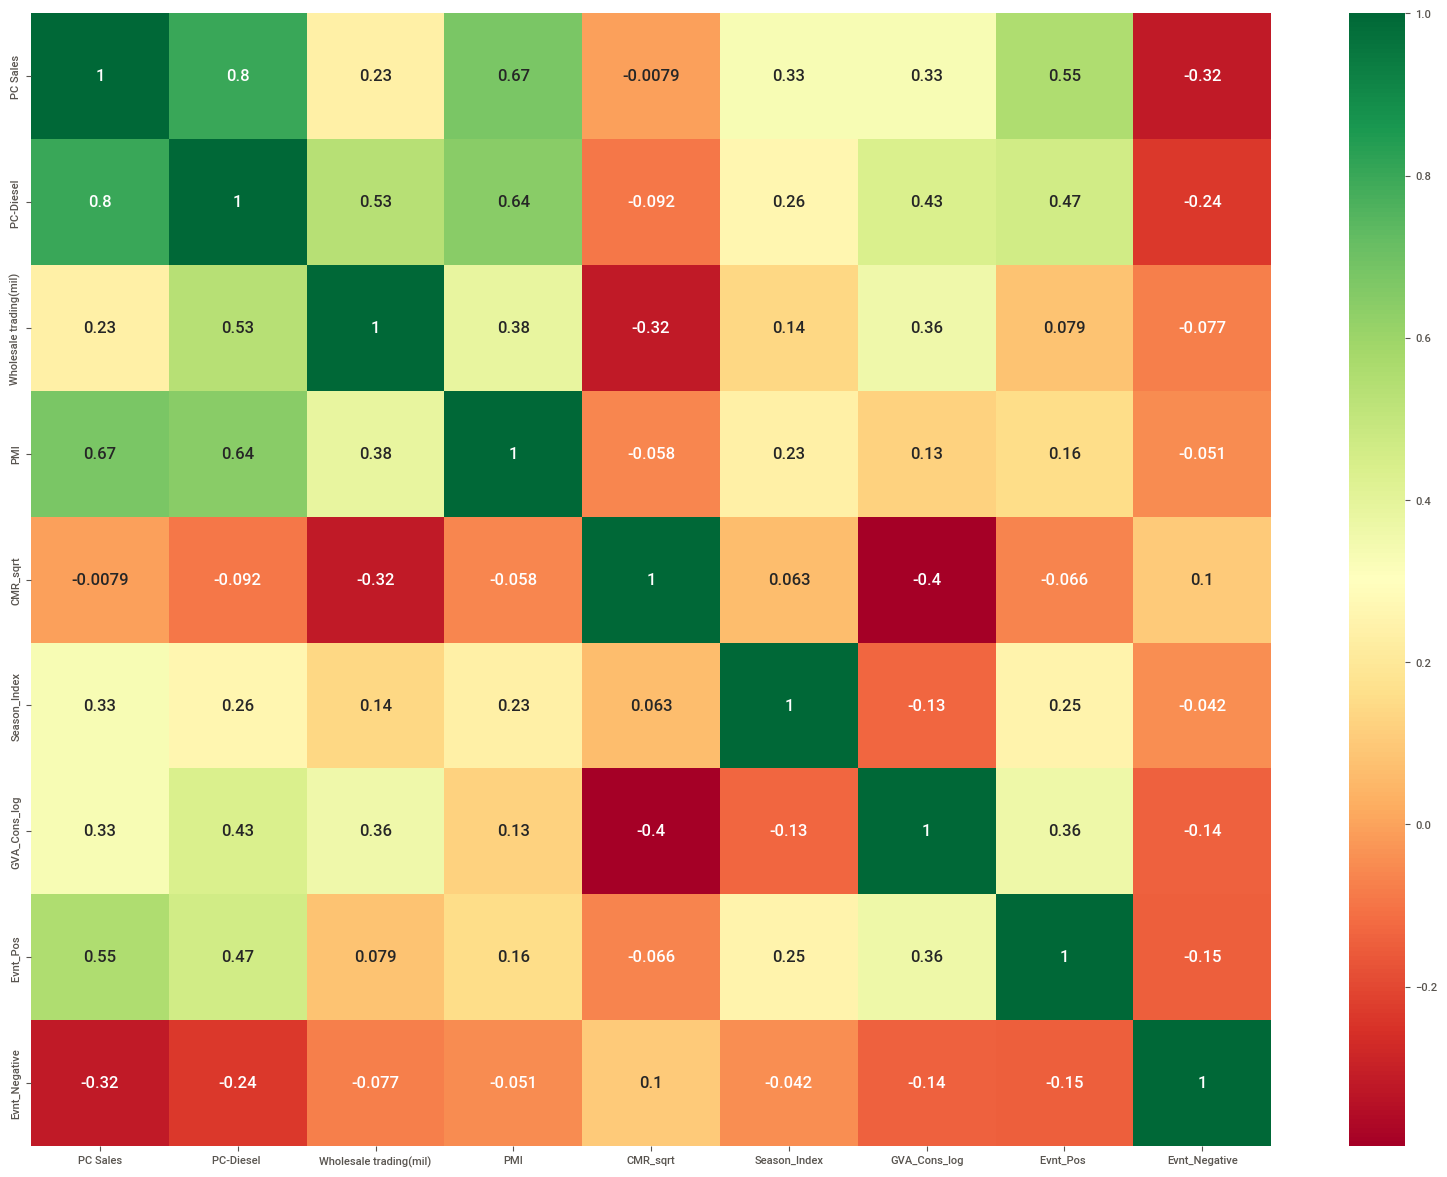

In [390]:
# calculate the correlation matrix
pc1 = pc_after.corr()
#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
# display the correlation matrix
#display(corr)
f, ax = plt.subplots(figsize=(20, 15))
# plot the correlation heatmap
sns.heatmap(pc1, xticklabels=pc1.columns, yticklabels=pc1.columns, cmap='RdYlGn',annot= True,annot_kws={'fontsize':12})

<AxesSubplot: xlabel='PC-Diesel ', ylabel='PC Sales'>

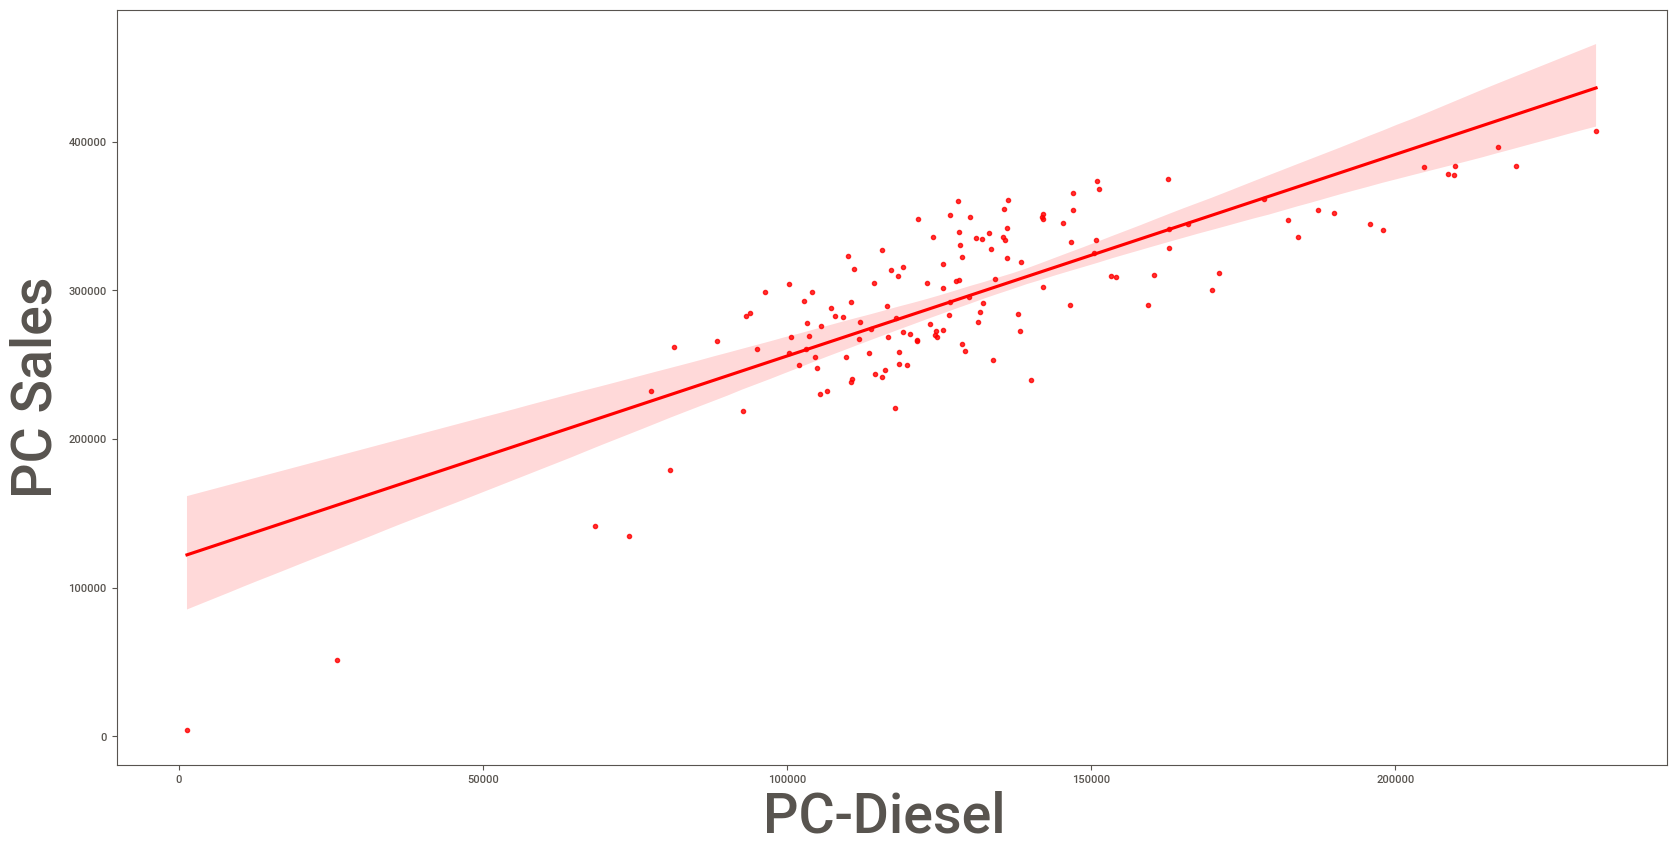

In [391]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="PC-Diesel ", y = "PC Sales", data = pc_after, color= 'red')

<AxesSubplot: xlabel='PMI', ylabel='PC Sales'>

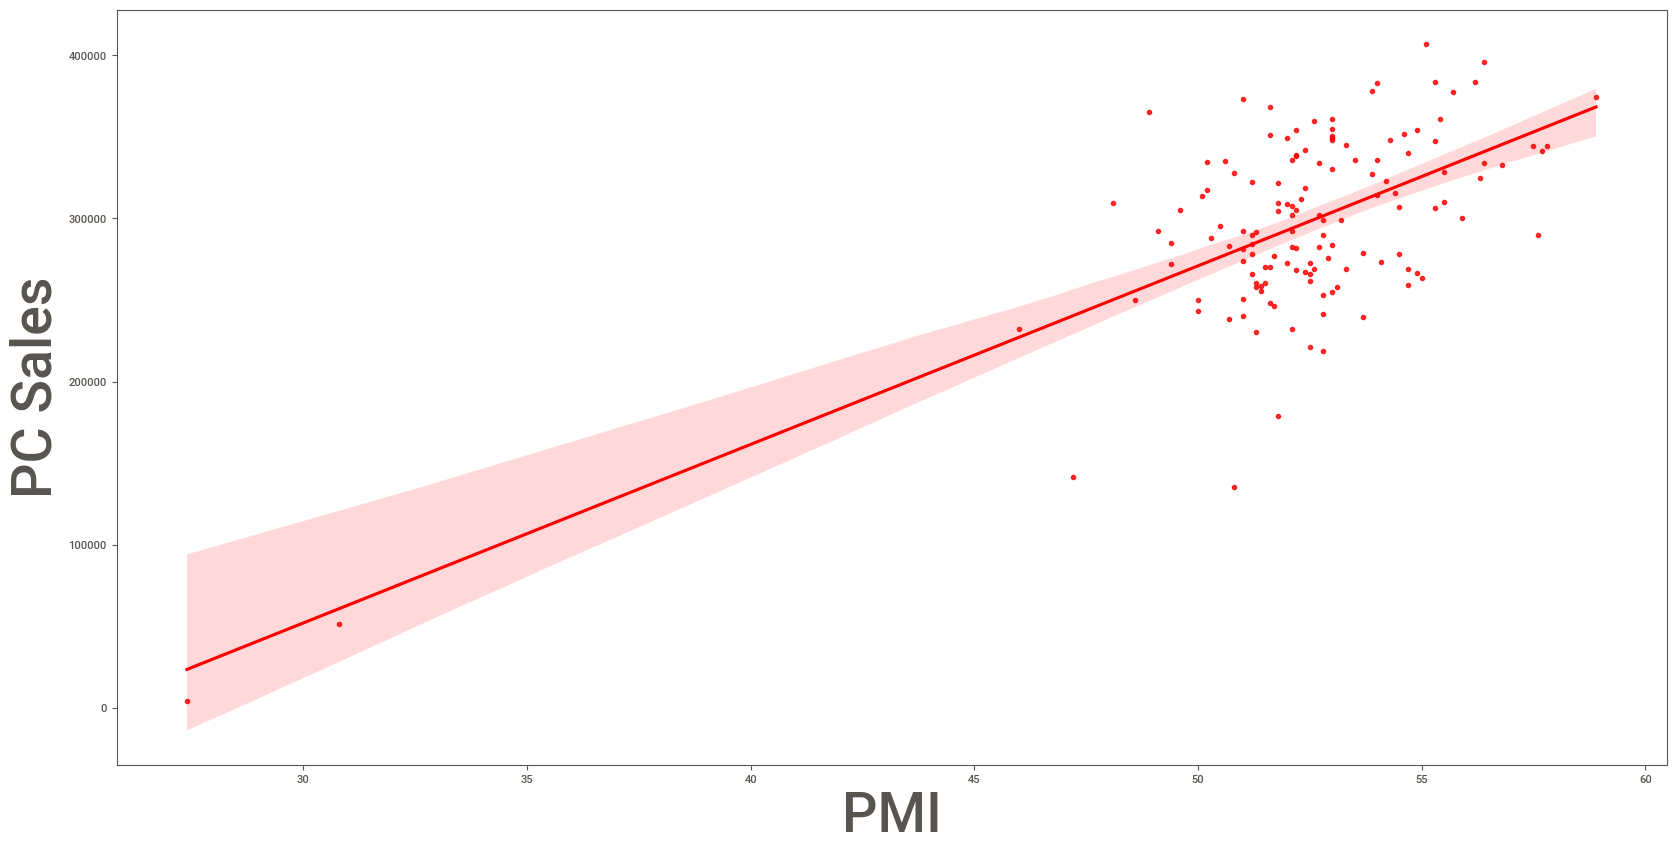

In [392]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="PMI", y = "PC Sales", data = pc_after, color= 'red')

<AxesSubplot: xlabel='GVA_Cons_log', ylabel='PC Sales'>

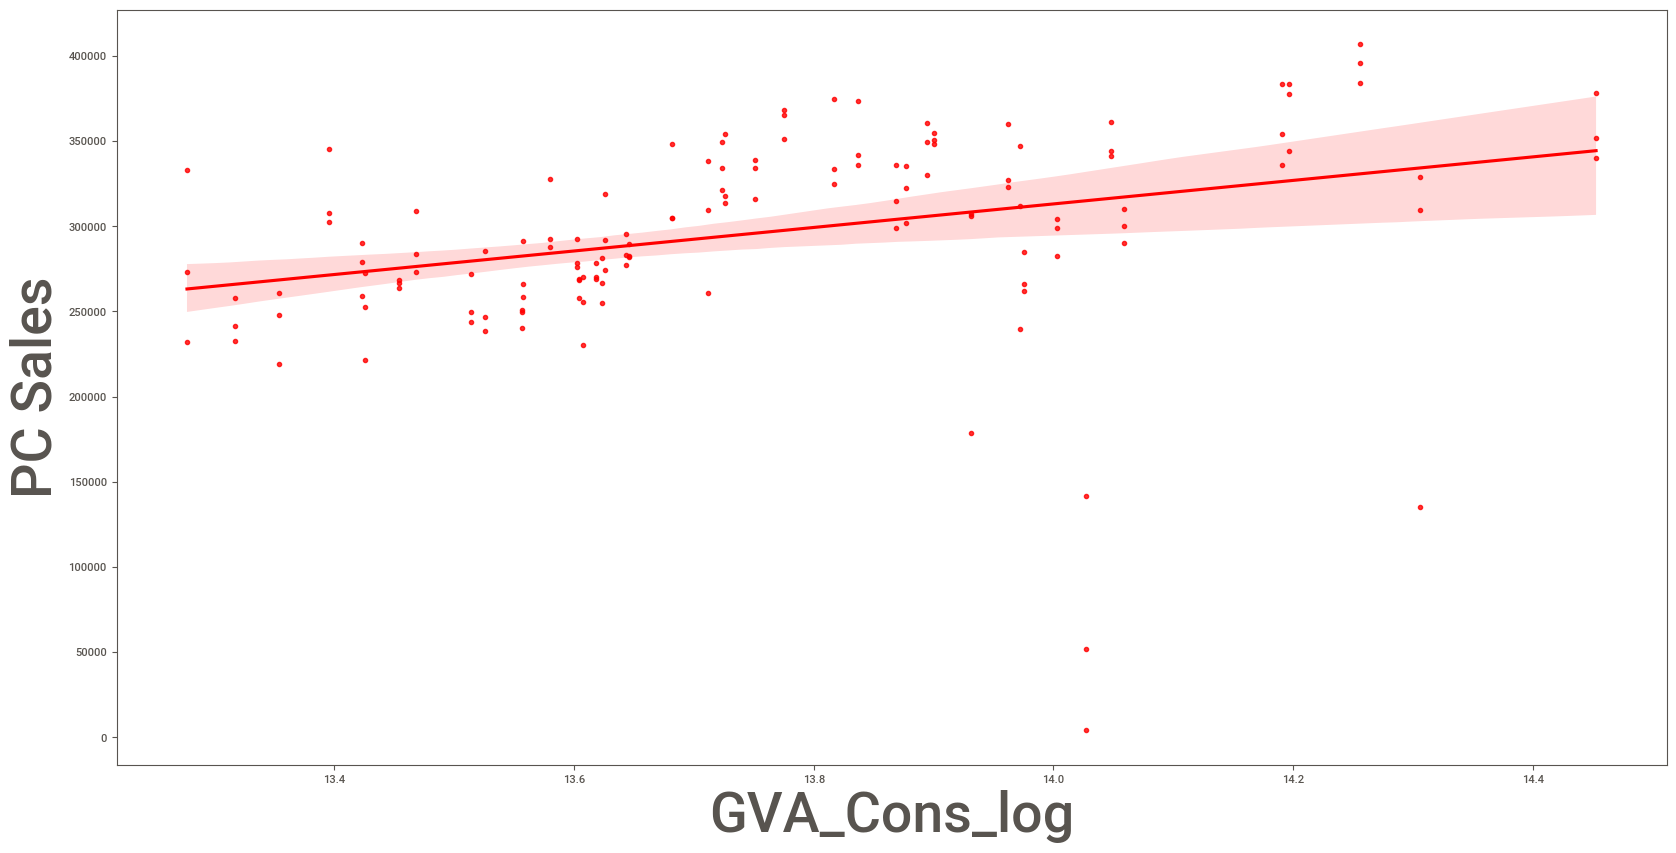

In [393]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="GVA_Cons_log", y = "PC Sales", data = pc_after, color= 'red')

In [395]:
# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [396]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)
predict = regression_model.predict(X_train)
# Show the first 12 predictions
train_mape = ((abs((y_train-predict)/y_train)).mean())*100
test_mape = ((abs((y_test-y_predict)/y_test)).mean())*100
print("Train Mape in % is ...", train_mape)
print("Test Mape in % is ...", test_mape)

Train Mape in % is ... PC Sales    8.582258
dtype: float64
Test Mape in % is ... PC Sales    39.178379
dtype: float64


In [397]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -1.423e+06
----------------------------------------------------------------------------------------------------
The Coefficient for PC-Diesel  is 1.7
The Coefficient for PC-Gasoline  is 0.088
The Coefficient for Wholesale trading(mil) is 3.9e+03
The Coefficient for Retail trading(mil) is -8.2e+03
The Coefficient for M1 is 2.8e+04
The Coefficient for M3 is 9.4e+04
The Coefficient for BEI is 1.3e+04
The Coefficient for IIP is -7.6e+03


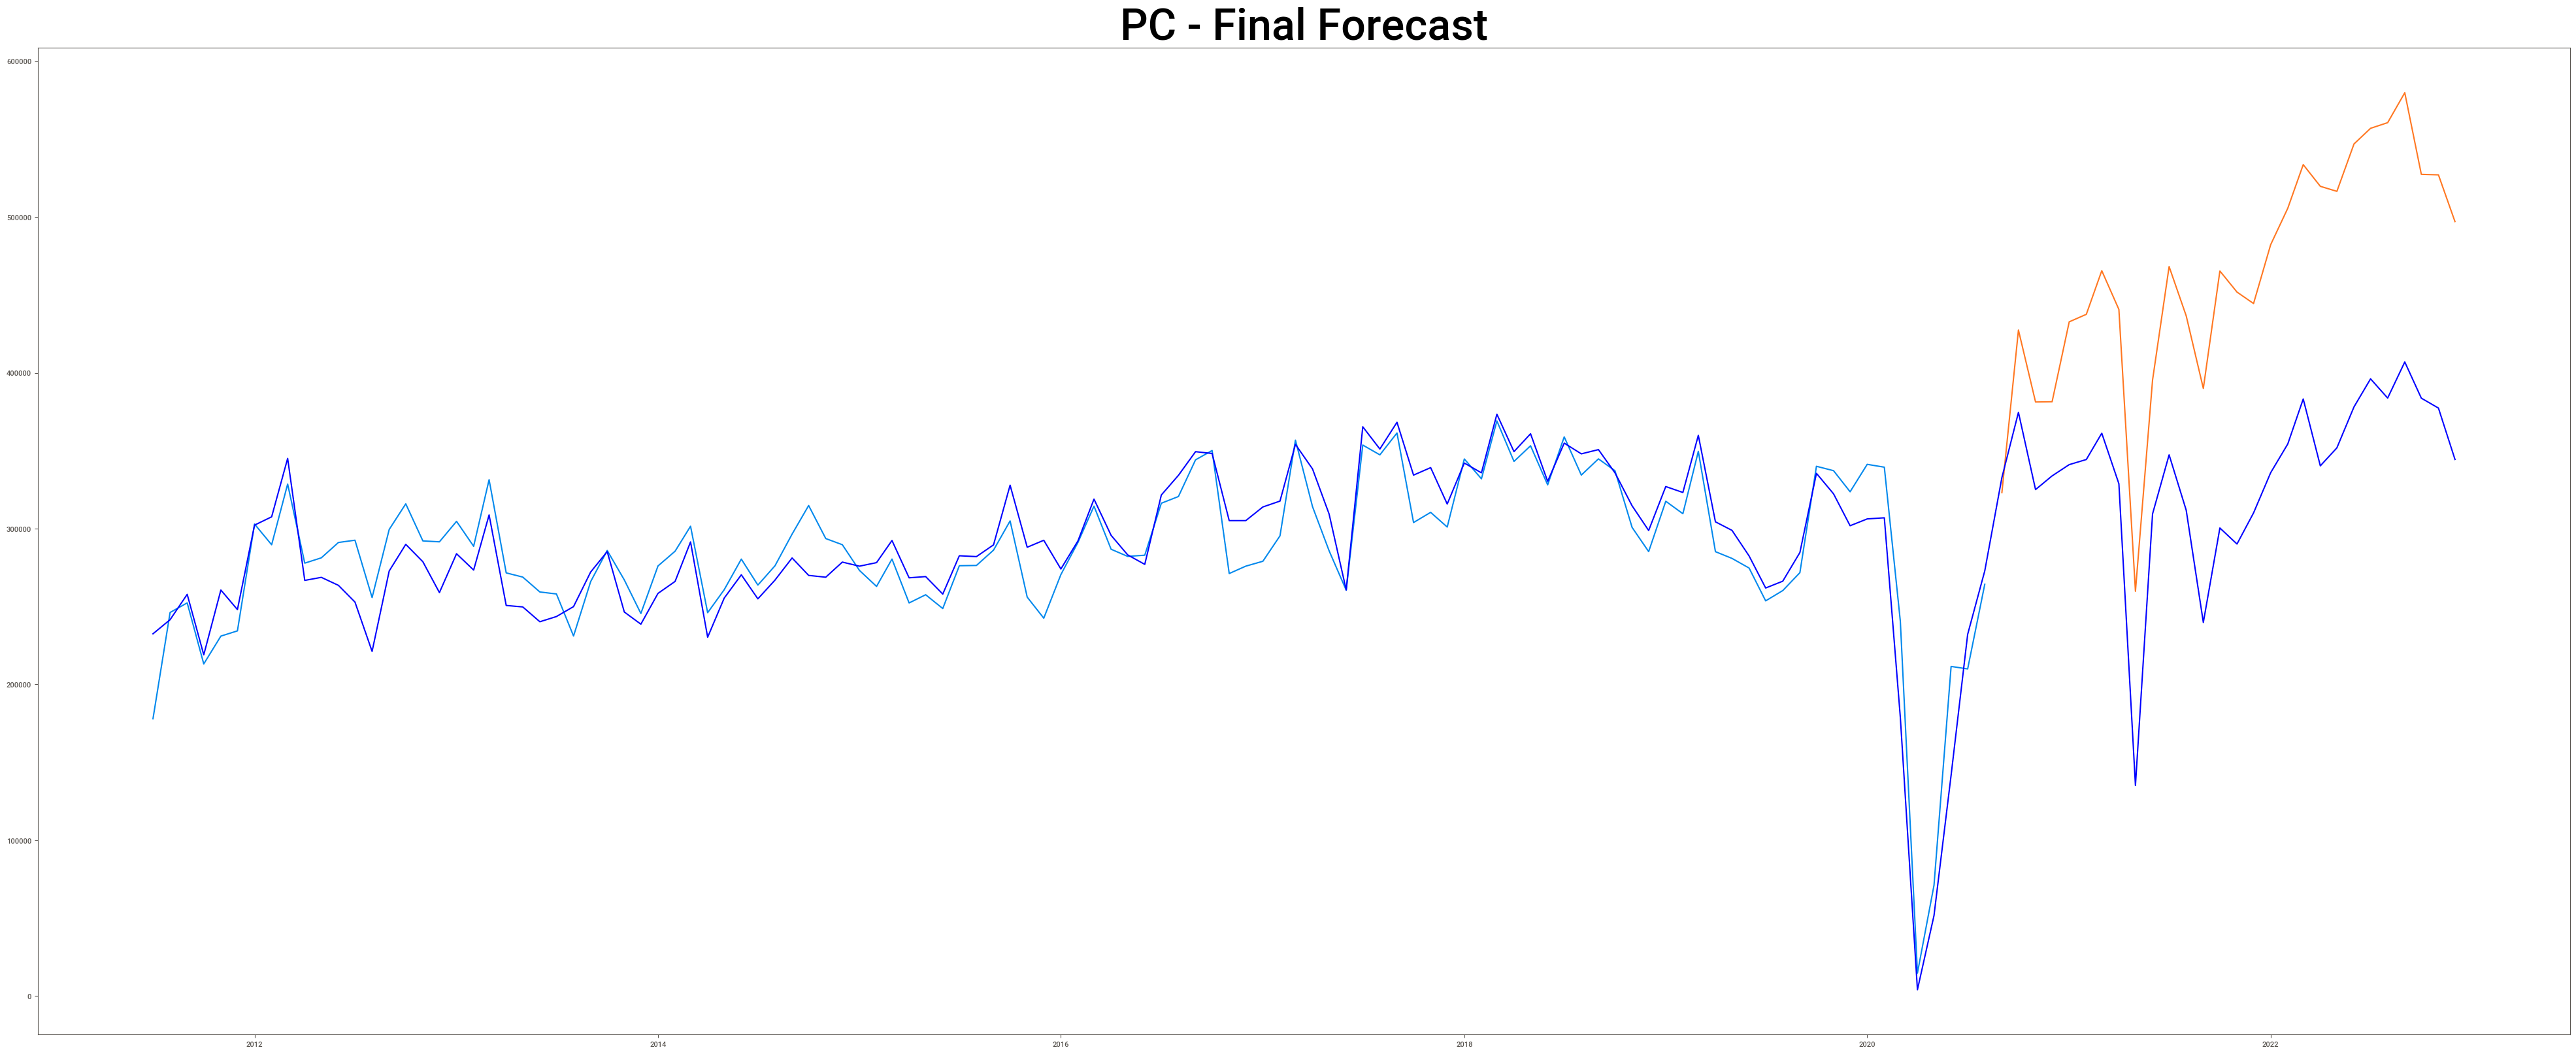

In [398]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.plot(X_train.index,predict)
plt.plot(X_test.index,y_predict)
plt.plot(X.index,Y,color = 'blue')
plt.title("PC - Final Forecast")
plt.show()

In [399]:
from sklearn.preprocessing import MinMaxScaler
X4 = X3
scaler = MinMaxScaler()
print(scaler.fit(X4))
MinMaxScaler()
print(scaler.data_max_)
X5 = scaler.transform(X4)

MinMaxScaler()
[2.33030000e+05 4.97911000e+05 5.89000000e+01 3.52384733e+00
 1.09697553e+00 1.44527811e+01 1.00000000e+00 1.00000000e+00]


In [400]:
from sklearn.preprocessing import MinMaxScaler
Y4 = Y3
scaler = MinMaxScaler()
print(scaler.fit(Y4))
MinMaxScaler()
print(scaler.data_max_)
Y5 = scaler.transform(Y4)

MinMaxScaler()
[406964.]


In [401]:
# Split X and y into X_
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X5_train, y5_train)

LinearRegression()

In [402]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X3.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 0.03264
----------------------------------------------------------------------------------------------------
The Coefficient for PC-Diesel  is 0.47
The Coefficient for Wholesale trading(mil) is -0.15
The Coefficient for PMI is 0.49
The Coefficient for CMR_sqrt is 0.053
The Coefficient for Season_Index is 0.046
The Coefficient for GVA_Cons_log is 0.028
The Coefficient for Evnt_Pos  is 0.074
The Coefficient for Evnt_Negative is -0.095
